In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [15]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model

In [16]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

In [17]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5,1,'Class 9')

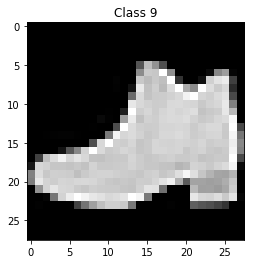

In [18]:
plt.imshow(X_train[15], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [19]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape


(60000, 28, 28, 1)

In [20]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(9, array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]))

In [21]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [22]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 10, 10, 64)        0         
__________

In [23]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [24]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [ ]:
# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

model.fit_generator(train_generator, steps_per_epoch=60000//32, epochs=5, 
 validation_data=test_generator, validation_steps=10000//32)

Epoch 1/5
1875/1875 [==============================] - 429s 229ms/step - loss: 0.5057 - acc: 0.8082 - val_loss: 0.3159 - val_acc: 0.8866
Epoch 2/5
1875/1875 [==============================] - 426s 227ms/step - loss: 0.3261 - acc: 0.8790 - val_loss: 0.2666 - val_acc: 0.8999
Epoch 3/5
1875/1875 [==============================] - 410s 219ms/step - loss: 0.2873 - acc: 0.8924 - val_loss: 0.2544 - val_acc: 0.9054
Epoch 4/5
1875/1875 [==============================] - 413s 220ms/step - loss: 0.2638 - acc: 0.9026 - val_loss: 0.2426 - val_acc: 0.9141
Epoch 5/5
1689/1875 [==========================>...] - ETA: 38s - loss: 0.2440 - acc: 0.9101

In [17]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 11s 1ms/step

Test accuracy:  0.9019


In [28]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn_fashion.csv', index=False)
